### Data Science Methods - week 2



*Authors: Cees Diks and Bram Wouters, Faculty Economics and Business, University of Amsterdam (UvA)* 

*Copyright (C): UvA (2024)* 

*Credits: some of the examples and formulations are taken from Hastie, Tisbhirani and Friedman (2009)*

## Topics week 2:

* Model evaluation + selection 
* Bias-variance trade-off
* Cross-validation
* Dimension reduction / PCA
* Nearest neighbor regression
* Kernel regression

<!-- Hastie 7.1, Reader 1.1 -->
#  Model evaluation

Choice between various models (or machine learning methods)

<!-- Can be a single model specification or learning method, but parameters need to be set (e.g. number of lags in an AR  model for time series) -->

When measuring model performance, we want to use a measure not for how good the model fits the data at hand, but how well the model generalises, i.e. of how well will it perform on new, unseen, data. 

Broadly speaking, there are two potential objectives for model evaluation.

* *Model selection*: comparing the performance of different models (often with varying complexity), in order to identify the best one.
* *Model assessment*: having chosen a final model, estimating how well it performs on new data.

In practical situations, either one of the objectives or both can play a role.<!-- In the latter case, one usually first performs a model selection and subsequently assesses the performance of the selected model. -->


## Regression model
<!-- Also applies to classification, not considered explicitly today -->

Consider

$$
Y =  f(X,\beta) + \varepsilon,  
$$

where $X = (X_1, \ldots, X_p)^T$ is an input vector (taking values in the ***feature space***), $Y$ a single response variable, and $\varepsilon \thicksim  \mathcal{N} (0, \sigma_{\varepsilon}^2)$ is Gaussian noise with unknown variance.

### Linear regression model

The well-known model is obtained for the specification
$$ 
  f(X,\beta) = \sum_{m=0}^p \beta_m X_m
$$
where $X_0$ is taken to be constant, usually $X_0 = 1$. 


## Extending the feature space

Next consider the regression model $Y =  f(X,\beta) + \varepsilon$, with $f$ specified as

$$
\quad f(X,\beta) = \sum_{m=0}^M \beta_m h_m(X), 
$$

where $h_m (x)$ are functions from $\mathbb{R}^p$ to $\mathbb{R}$, $m=1, \ldots, M$, called ***basis functions*** (we usually set $h_0(X)=1$).

In machine learning one often refers to $h_m(X)$ (rather than the elements of $X$) as ***features***. 

It is more accurate to refer to any of the $h_m(X)$ that are not identical to an element of $X$ as ***derived features***.

Note that the model still is a linear regression model if one or more of the basis functions are nonlinear, since the target variable is a linear function of the features.

<!-- (The elements $\beta_m$ of $\beta$ appear linearly on the r.h.s., we merely allow for nonlinear functions of $X$ in addition to the elements of $X$.) -->

### Likelihood function

$$
L(\beta, \sigma_{\varepsilon}) = P(\mathbf{y} | \mathbf{X} , \beta, \sigma_\varepsilon  ) = \prod_{n=1}^N \mathcal{N} (y_n | f(x_n, \beta), \sigma_\varepsilon^2) ,
$$
where $\mathbf{X}$ is the $N \times (M+1)$ matrix whose elements are given by $\mathbf{X}_{nm} = h_m(x_n)$. 

$\mathbf{y}$ consists of all values of the target variable in the training set, $\mathbf{y} = \left\{ y_1, y_2, \ldots, y_N\right\}$, and likewise, $\mathbf{X}$ contains the training set values of the input variable. 



### Log-likelihood function

$$
\ln L(\beta, \sigma_{\varepsilon}) = - N \ln \sigma_\varepsilon - \frac{N}{2} \ln(2\pi) - \frac{E_D (\beta)}{\sigma^2_\varepsilon},
$$

where

$$
E_D (\beta) = \frac{1}{2} \sum_{n=1}^N \left( y_n - f(x_n, \beta) \right)^2 = \frac{1}{2} \sum_{n=1}^N \left( y_n - \beta^T h(x_n) \right)^2
$$

is the sum-of-squared-errors. 

Note: maximizing the likelihood with respect to the $\beta_m$ is equivalent to minimizing the sum-of-squared-errors.

### Maximizing the log-likelihood function

Differentiating the log likelihood function with respect to $\beta_m$ gives

$$
\frac{\partial}{\partial \beta_m} \ln P(\mathbf{y} | \mathbf{X} , \beta, \sigma_\varepsilon  ) = \frac{1}{\sigma_\varepsilon^2} \sum_{n=1}^N \left( y_n - \beta^T h(x_n) \right) h_m(x_n) \, .
$$

Setting this to zero and solving for the $\beta_m$ leads to the so-called normal equations for the least squares problem,

$$
\hat{\beta} = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y}  = \mathbf{X}^+ \mathbf{y} \, , \label{ML_beta}
$$

where $\mathbf{y} = (y_1, y_2, \ldots, y_N)^T$. The quantity $\mathbf{X}^+ = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T$ is the Moore-Penrose pseudo inverse and can be seen as a generalization of the inverse.

MLE for $\sigma^2_{\varepsilon}$ found by maximizing the log likelihood function also w.r.t. the noise variance:

$$
\hat{\sigma}^2_\varepsilon = \frac{1}{N} \sum_{n=1}^N \left( y_n - \hat \beta^T \mathbf{X}_n\right)^2 \, . \label{ML_sigma}
$$

The quantities $\hat{\beta}_j$ and $\hat{\sigma}^2_\varepsilon$ are the maximum likelihood solution for the linear model, given a training set $\mathcal{T}.$ 

<!-- Reader 1.1 -->
# Example model (regression model, polynomial fit of order $M$)

Single continuous input variable $X$ and a single continuous target variable $Y$.

Training dataset $\mathcal{T} = \left\{ (x_1, y_1), (x_2, y_2), \ldots , (x_N, y_N) \right\}$. 
 
For simplicity we assume that the input variables are fixed on a lattice, $x_i = \tfrac{i-1}{N-1},$ and the target variables are given by $y_i = \sin (2\pi x_i) + \tilde{\varepsilon}_i.$ 

The $\tilde{\varepsilon}_i$ are a sample realization of the Gaussian noise random variable $\tilde{\varepsilon} \thicksim \mathcal{N} (0, \sigma_{\tilde{\varepsilon}}^2 = 0.04).$

<img src="figures_week2/lin_mod_training_set.png" alt="Example training set + underlying regression fn" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>


<h5>
    <center>
        Example training set + underlying true regression function 
    </center>
</h5>




<h5><center>
Solutions for $M =2, 5$ and $15$ given the training data.
</center></h5>

<img src="figures_week2/lin_mod_solutions.png" alt="Fits for M = 3, 6, 16" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

# Generalization error

<!--Assessing the generalization performance of a model is a crucial aspect of data science.--> 
Given a model trained on a data set $\mathcal{T},$ the generalization performance of the model tells us how well it predicts responses for new data independently drawn from the same population distribution as $\mathcal{T}.$  

### Loss function

To quantify this predictive ability, one first defines a ***loss function*** that measures the size of the prediction error for a trained regression model $\hat{f}(X)$. 

Typical loss functions are

$$
L(Y, \hat{f}(X)) =
\left\{
\begin{array}{ll}
(Y - \hat{f}(X))^2 & \qquad \text{(squared error)}  \\
& \\
|Y - \hat{f}(X)| & \qquad \text{(absolute error)} 
\end{array} \right.
$$

<!-- Note that the linear model example above is of this form, with $\hat{f}(X) = f(X,\hat{\beta})$. -->



### Generalization error (cntd)

Given a loss function, the ***generalization error*** (also called ***test error***) is defined as

$$
\text{Err}_\mathcal{T} = E[L(Y, \hat{f}(X)) | \mathcal{T}] \, , \label{eq:generalization_error}
$$

where the expectation is taken with respect to the joint distribution of $(X, Y)$. 


### Note: 

Generalization error is defined with respect to a data set $\mathcal{T}$. 

For the specific model that is trained based on $\mathcal{T},$ it measures the average prediction error on unseen data that was not used to train the model. 

In many practical situations, the generalization error is the quantity of interest. However, it cannot always be estimated accurately. Often if you try to estimate it you get something that is actually closer to $\text{Err}$ (see next slide).

<!--
It is informative about the prediction capability of the model trained on $\mathcal{T}$, when it is applied to independent data drawn randomly from the population.
-->

### Expected test error 
A related quantity, called the expected prediction (or test) error,
is given by

$$
\text{Err} = E[L(Y, \hat{f}(X))],
$$

where the expectation is taken with respect to $(X, Y)$, as well as the set $\mathcal{T}$ of fixed size $N$ to train the model on. 

The observations in $\mathcal{T}$ are drawn independently from the same joint distribution as $(X, Y)$. 

This means that the prediction error is the expectation of the generalization error when averaged over all possible sets of observations $\mathcal{T}$: 

$$\text{Err} = E_\mathcal{T}[\text{Err}_\mathcal{T}].$$ 

Both error measures and their relation are visualized for the polynomial model. We generated 100 i.i.d. data sets of size $N=20$ and trained polynomial models of degrees ranging from $0$ until $15$ on each of them. For each of the resulting models we calculated the generalization error by simulating another $1000$ data points (thin red lines). The average generalization error, or average test error, is indicated by red dots. 

<img src="figures_week2/lin_mod_errors.png" alt="Linear model errors" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

### Training error

A third related quantity is the training error, which is the average loss on the set $\mathcal{T}$ the model was trained on,

$$
\overline{\text{err}} = \frac{1}{N} \sum_{n=1}^N  L(y_n, \hat{f}(x_n)) \, .
$$




Training errors for the different simulated training samples (blue lines). 

<img src="figures_week2/lin_mod_errors.png" alt="Linear model errors" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

When the model complexity (i.e. 
the degree $M$ of the polynomial) is increasing, the (average) training error is decreasing to zero. 

<!-- Intuitively this makes sense, as increasing complexity => more parameters to fit the model to the training data => *overfitting* -->

## Summary regarding performance measures
* In most practical applications, one desires a model with a high generalization performance. 

* $\Rightarrow$ generalization error should be small. 

* But directly estimating the generalization error usually is not possible. 

* In practice we often work with an estimate of the expected prediction error. 
<!-- This will be discussed further below. -->

* A high generalization performance can be associated with a low prediction error. 

Note: The training error can never be an indicator of the generalization performance, as we can make the training error arbitrarily small without (as we will see) improving generalization performance.


<!-- Hastie 7.3 -->
# Bias-variance decomposition
Using the squared-error loss function, the expected prediction error at a specific point $X = x_0$ can be written as

$$
\begin{align}
\text{Err}(x_0) 
& = E[ ( Y - \hat{f}(X) )^2 | X = x_0] \\
& = [E \hat{f}(x_0) - f(x_0)]^2 + E[\hat{f}(x_0) - E \hat{f}(x_0)]^2 + \sigma_\varepsilon^2 \\
& = \text{Bias}^2 (\hat{f}(x_0)) + \text{Var}(\hat{f}(x_0)) + \sigma_\varepsilon^2 \\
& = \text{Bias}^2 + \text{Variance} + \sigma_\varepsilon^2 \, ,
\end{align}
$$

where in the second line we have used that $Y = f(X) + \varepsilon$.

The prediction error can be decomposed into three terms: 
* the bias (squared) of the estimated model, 
* the variance of the estimated model, 
* the variance of the Gaussian noise. 


<!-- 7.2 (Reader 1.3) --> 
# Bias-variance trade-off

Model complexity

We want a model with high generalization performance (low expected prediction error). 

Since we cannot influence the variance of the innovations, we wish to find a model for which the squared bias plus the variance is at its minimum. 

In doing so, one has to make a trade-off between bias and variance: decreasing the bias squared (often) means increasing the variance, and vice versa.



To understand this, realize that as a function of the model complexity the bias squared is a decreasing function. 

Simple models often have a large bias, as it lacks enough degrees of freedom (parameters) to approximate the true underlying model well. 

Think of the polynomial model with $M=1.$ In that case we are trying to model the sinusoid of the underlying datagenerating process with a straight line, leading to a poor approximation and hence a large bias. 

A larger $M$ (larger model complexity) gives us more degrees of freedom and would enable us to approximate the sinusoid with a higher accuracy. 



However, an increasing model complexity will also lead to a higher variance. 

In the polynomial model with $M=1$ all possible data sets $\mathcal{T}$ would lead to a straight line, while for larger $M$ the model estimate $\hat{f}(X)$ will fluctuate more wildly, depending on the details of the data. 

This leads to a larger average deviation of $\hat{f}(X)$ from its mean and hence a larger variance. 

Somewhere between a low and high model complexity, there is an optimum where the squared bias plus the variance is minimal. 

The optimal trade-off between bias and variance will lead to the minimum expected prediction error and a maximum generalization performance.

To illustrate this trade-off, let's look at the linear model for regression introduced in Section \ref{sect:lin_mod}. Using that the model estimate is given by 

\begin{equation}
\hat{f}(X, \beta) =\ \sum_{m=0}^{M} \hat{\beta}_m h_m(X) = \sum_{m=0}^{M} \sum_{n=1}^{N} \mathbf{X}^+_{mn} \, y_n \, h_m(X) \, ,
\end{equation}

one can show that the prediction error at position $x_0$ is given by

\begin{equation}
\text{Err}(x_0) = [E \hat{f}(x_0) - f(x_0)]^2 + || \mathbf{\chi}(x_0)||^2 \sigma_\epsilon^2 + \sigma_\epsilon^2 \, , \label{eq:pred_error_lin_mod_x0}
\end{equation}

where the $N$-dimensional vector $\mathbf{\chi}$ has components $\mathbf{\chi}_n (x_0) = \sum_{m=0}^{M} h_m (x_0) \, \mathbf{X}^+_{mn}.$ 

The variance term depends on the position $x_0.$ To get the actual prediction error, one needs to average over the distribution of the independent variable $X.$ Assuming the fixed and uniformly distributed $x_n$ of the polynomial model, one finds

\begin{equation}
\frac{1}{N} \sum_{n=1}^N \text{Err}(x_n) = \frac{1}{N} \sum_{n=1}^N   [E \hat{f}(x_n) - f(x_n)]^2 + \frac{M}{N} \sigma_\epsilon^2 + \sigma_\epsilon^2 \, . \label{eq:pred_error_lin_mod}
\end{equation}

This leads to the conclusion that for the polynomial model the variance term in the prediction error grows linearly with the degree of the polynomial. As expected, increasing model complexity means increasing variance.

For real-world data, it is impossible to simulate additional training sets and/or data points to compute the generalization errors and expected prediction error.

$\Rightarrow$ We need alternative procedures to estimate the generalization and prediction errors. 

<!-- We next describe several of those procedures, with a special focus on $K$-fold cross-validation. -->

(Training errors can be calculated directly from the training set and will therefore not be considered here.)



In general, one can distinguish two situations: data-rich situations and cases of insufficient data. 

In data-rich situations, <!-- the best approach is to --> randomly split the full data set in three parts: a training set, a validation set and a test set:


<img src="figures_week2/data_split.png" alt="Typical data split" style="display:block; margin-left: auto; margin-right: auto; width: 50%;"/>

The training set is used to estimate models (typically of varying complexity). 

<!-- Usually, one fits different models that vary in complexity.  -->

Select the best model by comparing the models' forecast errors across the data points of the validation set. 

Having selected the best model, one can assess its performance by calculating the generalization error using the test set. 



Note: the generalization error calculated on the validation set cannot be used as a proper assessment of the generalization performance of the selected model. 

The particular model might have been selected because it performs well on the particular validation set. 

$\Rightarrow$ error calculated on the validation set expected to underestimate the actual generalization performance.

Also note: no general rule for the preferred (relative) size of the three sets, but
* the training set needs to be big enough to produce a reliable model estimate, 
* the other two sets must be big enough to produce a reliable estimate of the generalization error. 

<!-- Below we sketch a typical split: $50\%$ for training, $25\%$ for validation and $25\%$ for testing. -->



Unfortunately, most practical situations are not data rich. 

There is (again) no general criterion for when there is sufficient data available to split it into three sets. 

This can only be answered case-by-case, taking the following (non-exhaustive) list of factors into account: 
* performance requirements of the model, 
* signal-to-noise ratio of the data, 
* dimensionality of the input space, 
* complexity of the model, 
* required precision of performance estimates. 

We next discuss alternative procedures for data-sparse situations. 

<!-- Note that we will only be concerned with the prediction error, as estimations of the generalization error are generally unfeasible in non-data-rich situations. We will distinguish two types of procedures: calculating errors from data on which the model was trained (in-sample errors) versus calculating errors from data that was excluded from the training set (extra-sample errors). -->


# 7.4 Optimism of the Training Error Rate

# 7.12 Conditional versus expected test error

# 7.5 Estimates of in-sample prediction error 



<!-- 7.5 and 7.7 -->
# Information theoretical measures (AIC/BIC)

Idea: for each model, the maximum log-likelihood $\hat L$ (maximized across unknown model parameters) is a measure for how well the model can describe the data at hand (the in-sample model fitness). 

However, without penalizing for increasing model complexity, this is not a good measure for the generalization error, since the log-likelihood typically is an increasing function of model complexity. 

To construct useful measures for generalization error based on the log-likelihood, additional penalties are required, taking into account model complexity.



### Akaike's information criterion (AIC) and Bayes' information criterion (BIC)

Defined by taking minus twice the maximized log-likelihood 
<!-- (a measure for model unfittness, so it is smaller for better fits), -->
with a penalty for model complexity 

$$
\mathrm {AIC} = -2\ln(\hat{L}) + 2 (M+1).
$$
 
$$
 \mathrm {BIC} = -2\ln(\hat {L}) + \ln(N) (M+1). 
$$

* In practice, model selection across a set of models is performed by choosing the model with the smallest AIC/BIC
* These information-theoretical measures are very well suited for sparse data situations, since all the observations can be included in the model estimation step. 
* The validation is done implicitly, by adding penalty terms, the analytic form of which is motivated using information-theoretical statistical insights.
* No observations need to be held back for validation (although one may still hold out a test sample to assess the performance of the selected model).

### Comparing AIC and BIC

Note: the only difference between these two measures is the factor in front of the number of features $M$.

for $\ln(n) > 2$ ($n \geq 8$ observations) BIC penalizes the addition of an extra parameter more than AIC. 

Therefore, BIC favors smaller models than AIC.

AIC is not consistent, in that it selects complex models too frequently

BIC is consistent, but often selects models with small complexity in practice


## Cross-validation

Extra-sample (out-of-sample) errors are calculated on data that was not used to train the model (i.e. excluded from the training sample). 

$K$-fold cross validation (CV) is an example of an extra-sample error, as is the hold-out method. <!-- and nowadays probably the most widely used method for model evaluation in data science. --> 

<!-- Before discussing $K$-fold CV, let us mention another extra-sample evaluation method: the holdout method. -->

In the holdout procedure, the full data set is randomly split in two subsets. 
* The first is used to train the model, 
* the second data set is used to compute the performance of the trained model (defined by the choice of loss function $L$). 

Because the split is random, the training and test set can be considered independent. 



The holdout method only provides a reasonable estimate of the expected prediction error, not of the generalization error. 
<!-- This is mainly because the random choice of the finite-size test set causes a large variance in the calculated error. -->

There is no general rule for the relative sizes of the two subsets.
* A large training set has the advantage of a small bias with respect to the prediction error.
* This goes at the cost of a small test set and hence a large variance of the calculated error. 

As we will see, $K$-fold CV offers a remedy for the large variance of the calculated holdout error. 

Some advantages of the holdout method over CV: 
* Computationally less expensive.
* Technically easier to implement.

$\Rightarrow$ holdout method is usually only used for very large data sets or when time (both programmer's time and computation time) is a critical factor.

## The $K$-fold cross-validation estimate
We will explain the procedure in the context of the simple linear model and therefore assume a set 

$$\left\{ (x_1, y_1), (x_2, y_2), \ldots , (x_N, y_N) \right\}$$ 

of $N$ available data points. 

<!-- Any generalization to other data types and other models is straightforward. -->

First step: randomly distribute the available data across $K$ (roughly) equal-sized subsets. 

<!-- Important that this splitting is performed randomly. -->

If the subsets are indexed by $k,$ with $k=1,\ldots,K,$ then we can define functions $g_k: \left\{1,\ldots,N_k\right\} \to \left\{1,\ldots,N\right\}$ that select the $N_k$ datapoints of the $k$-th subset out of the full size-$N$ data set. 

The subset sizes $N_k$ are taken to be roughly equal. If $K$ is a divisor of $N,$ they can be made exactly equal. 

Singling out a specific subset $k,$ the idea of CV is to train the model on the other $K-1$ subsets (we denote the resulting model by $\hat{f}^{-k}(X)$) 
and subsequently test its performance on the subset $k$ (using loss function $L$). 

This is repeated $K$ times, where each subset acts once as the left-out test set. 

Taking the average of the $K$ errors, we arrive at the CV estimate of the expected prediction error:
\begin{equation} \label{eq:CV}
\text{CV} =\ \frac{1}{K} \sum_{k=1}^K \text{CV}_k \, , 
\end{equation}
where the error on test set $k$ is given by
\begin{equation}
\text{CV}_k =\ \frac{1}{N_k} \sum_{i=1}^{N_k} L \left( y_{g_k (i)}, \hat{f}^{-k} ( x_{g_k (i)} ) \right) \, . \label{eq:CVk}
\end{equation}
<!-- In the next Figure, the computation of the CV estimate is depicted schematically. -->

### The cross-validation estimate depicted schematically

<img src="figures_week2/CV_data_split.png" alt="Typical data split" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>


As indicated before, the CV error is only a good estimate of the expected prediction error and not of the generalization error. 

Intuitively this is not immediately clear, but there is ample empirical evidence that this is the case. See for example Section 7.12 of Hastie *et al.*

### Optimal choice of K

<!-- The best choice for the number of subsets $K$ depends on the situation. -->

In principle, one can compute a CV estimate for any value of $K$ ranging from $K=2$ to $K=N$. 

Latter is a special case<!--, in the sense that each left-out test set consists of a single data point -->: leave-one-out cross-validation (LOOCV).

Large $K$ advantage: CV estimate relatively unbiased for expected prediction error. 

(Because the training sets are large, creating model estimates that perform relatively similar to model estimates on the full data set.)

Comes at the cost of a larger variance of the CV estimate, because the different training sets are relatively similar for large $K.$ 

Potential disadvantage of large $K$: computational cost of applying the training method $K$ times.

For small values of $K,$ bias can become a serious problem. 

To understand this, look at the hypothetical error as a function of the size of the training set shown in the figure below. 

The expected error decreases with increasing size of the training set, eventually approaching some irreducible error due to Gaussian noise in the data. 



Consider $5$-fold CV. For $N=200$, training set contains $160$ data points. The expected errors for $160$ and $200$ data points are close (small CV estimate bias). For $N=50$, training sets have size $40,$ and the difference in expected errors is much larger. For the smaller training set, the bias of a $5$-fold CV is larger and to decrease the bias one would need to increase $K.$ 

<img src="figures_week2/err_vs_size.png" alt="Typical data split" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

To summarize, the ideal value of $K$ depends on the situation. 

Some factors to take into consideration are the maximum acceptable bias and variance of the estimate and the computational time it would take to perform the CV procedure. 

Typical values that are being used in practical applications are $K=5$ or $K=10.$

### Model selection with cross-validation

In the next Figure an example is given of the use of CV for model selection. 

Using the linear model with $N=50,$ we have plotted the expected prediction error, the average training error and the $K$-fold CV estimates for $K=5$ and $K=25$ as a function of $M.$ 

We have included error bars for the CV estimates, which represent the standard deviation of the errors of the different folds (i.e. the standard deviation of $\text{CV}_k$). 

We have used $N=50$ instead of the usual $N=20,$ because for very small data sets the patterns in CV estimates are less clear due to high variance.

Expected prediction error (red), expected training error (blue) and $K$-fold CV estimates for $K=5$ (green) and $K=25$ (purple) as a function of $M,$ for the linear model with $N=50.$ The error bars on the CV estimates represent the standard deviation of $\text{CV}_k$.

<img src="figures_week2/lin_mod_CV_errors.png" alt="Typical data split" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

First, note that the CV estimate for large $K$ is less biased with respect to the prediction error. 

This makes sense, because the size of the training sets for $K=25$ is 48, whereas for $K=5$ is it 40. 

Since the prediction error assumes a size of the training set of $50,$ this is closer to the training set size of $25$-fold CV and hence the bias is smaller. 

<!-- 
According to Hastie *et al.* the RMSE estimate should be expected to have larger variance for the $25$-fold than for $5$-fold CV, because of the smaller size of the test sets for $25$-fold CV. However, we don't observe this typical behavior in this example, at least as judged by the standard errors.
-->
Finally, we see that (most of the time) both cross-validations overestimate the prediction error. 

This is due to the smaller training sets, leading on average to model estimates that deviate more from the underlying data-generating process.



Coming back to the issue of model selection with cross-validation, often a ''one-standard-error'' rule is used. 

This rule dictates that the least complex model whose CV error is no more than one standard deviation above the smallest error is selected. 

We see that both cross-validations give a minimum RMSE for $M=9$. 

In both cases the least complex model whose error is not more than one standard deviation above the minimum RMSE, is the model with $M=3.$ 

So using this rule, both $5$-fold and $25$-fold CV would select the model with $M=3$ as the best model. 

<!-- Hastie 3.4 ->
# Shrinkage methods

The idea, dating back to Gauss, behind least-squares estimation of a regression function is that by minimizing (w.r.t. an unknown model parameter $\beta$) the mean squared error
$$
\sum_{n=1}^N \left( y_n - f(x_n, \beta) \right)^2,
%L(Y, \hat{f}(X)) = (Y - \hat{f}(X))^2,
$$
we obtain the best 'fit' to the data in the mean-squared-error sense. 

<!-- 
Although this may indeed provide the model that best fits
the training data set, in practice there are 
--> 

But: model selection considerations to be taken into account when aiming for a model that<!--, besides fitness to the estimation sample,--> also has the capability to perform well on new, unseen, data (i.e. a model that has small generalization error). 

<!-- In choosing the model complexity, the bias/variance trade-off plays an important role. We have seen that models of too high complexity have a tendency to over-fit the estimation data leading to forecasts with high variability across estimation data sets, while models of too low complexity can be seriously biased even for large training sample sizes. -->



#   Curse of dimensionality 1

More features not always better 
* model complexity can explode with number of features
* more features $\Rightarrow$ more degrees of freedom in model


## Curse of dimensionality 2

Example: polynomial of degree $5$ in $1$-d and $2$-d.

In $1$-d, a total of $D+1 = 6$ parameters.

In $2$-d, interaction terms enter: $X_1^\ell X_2 ^m, \quad$ $\ell, m \in 0, \ldots, D$ 

Already gives $(D+1)^2 = 36$ coefficients.



## Curse of dimensionality 3


Example: Nearest neighbor methods (see below) suffer in high dimensions (no close neighbours)

\# neighbours within distance $r$ from any given feature vector $\propto \left(r/r_{max}\right)^M$

$\Rightarrow$ probability of finding a neighbour within a given distance $r$ rapidly vanishes with $M$




## Curse of dimensionality 3

Take-home message curse of dimensionality:

The more flexible your model, the more it will suffer from the curse of dimensionality


## Feature selection 1: motivation

First method to reduce dimensionality:

feature selection = variable subset selection = subset selection

discard features that are not informative, or that are redundant

Potential advantages:

* model becomes simpler
* therefore simpler (and faster) to estimate
* and easier to interpret,
* and generalization error is reduced


## Feature selection 2: feature selection vs. feature extraction

Note: feature selection differs from feature extraction, which is another often-used method.


* In feature extraction one creates new (derived) features as functions of the original features,
* while in feature selection the aim is to select a subset of the features by removing uninformative and irrelevant features.

## Feature selection 3: when?

* feature selection is clearly needed in applications where there are many features and relatively few observations,

* such as in DNA micro-array data, where there are many thousands of features, and of the order of 20 to 100 observations,

* it may still be useful in cases where there are fewer features and relatively many observations (as in financial applications)

* as long as the loss of information by discarding the uninformative/irrelevant features is counterbalanced by an accompanying reduction in generalisation error.

## Feature selection 4: exhaustive approach (for small $M$)

* If $M$ is small (say up to $20$) this can still be done exhaustively

* Provides us with a measure of the performance of the best model with $k$ features,
*  This is plotted as a function of $k$ (a measure of model complexity) to aid the selection of the optimal model complexity $k$.

## Feature selection 5: forward- and backward stepwise regression (for large $M$)

* Iteratively adds the best feature (or deletes the worst feature, respectively) in each round.
* The forward approach increases $k$ at each step starting from $k=0$ (no features) and adding the best feature in each round
* The backward approach starts at the full set of features, dropping the worst in each round.
* The main choice determining the outcome of these algorithms is the criterion that is used for deciding when to stop adding or deleting features.
* This is typically done by cross-validation.

## Feature selection 6: notes

  Note 1: stepwise regression approaches are greedy

 
  
  They might miss the optimum subset for some intermediate values of $k$ (for $k=0$ and $k=M$ there is only one subset to consider).

  

  Note 2: Lasso regression can automatically force coefficients to be zero

 
  
 $\Rightarrow$ It can be considered as a technique that performs feature selection at estimation time.

## Intro Principal component analysis 1

Alternative dimension reduction method

Abbreviation: PCA. Dates back to Pearson, 1901

$M$ features $\mathbf{X}_i = (X_{1,i}, \ldots, X_{M,i})^T$, $i = 1, \ldots, N$.

$\mathbf{X}_i$ $\sim$ some distribution in the $M$-dimensional feature space

 

## Intro Principal component analysis 2: motivation

Idea:  variation of the features across the
feature space might be described well by the variation of the features in a small number of dominant directions.


As a result, the variation of the data might take place predominantly in a subspace of dimension $L < M$.



$\Rightarrow$ extract a small number of $L < M$ linear combinations $Z_{\ell}$, $\ell=1,\ldots, L$ of features (or directions) that explain most of the variation in $\mathbf{X}_i$


then continue the data analysis using the $L$ variables $\mathbf{Z}_i = (Z_{1,i}, \ldots, Z_{L,i})^T$, $i = 1, \ldots, N$ rather than the $M$ original variables. 

## Intro Principal component analysis 3: noise reduction


Equivalent to projecting the explanatory variables on a lower-dimensional linear sub-space;


thus discarding/ignoring the variation of the features in the other (perpendicular) directions.


This may be considered as a disadvantage (we are throwing away information)

but if the variation in the directions that we ignore happens to be largely due to noise, the projection step may actually help to get rid of this noise,

in that sense this may `clean' the input variables (features) to some extent (not completely, since there may still be noise present in the projected variables $\mathbf{X}'_i$).


## Intro Principal component analysis 4: invariance under rescaling


A potential disadvantage of PCA:


* based on the variance-covariance matrix, rather than the correlation matrix.

* $\Rightarrow$ not invariant under changing units of measurement (i.e. rescaling)

* Rescaling will lead to different principal components.

* In particular, if one feature has a variance that is much larger than that of the others, it will be nearly identified with the first principal component

* This problem can be avoided by standardising each variable to unit sample variance (in addition to zero sample mean) prior to applying PCA.

* Using this standardisation is common practice among practitioners now. 




## Intuition PCA 1

Consider a bivariate normal distribution centered around (for simplicity) the origin.


First consider the case where the covariance between $X_1$ and $X_2$ is zero.


If $X_1$ and $X_2$ have identical variance, the distribution is spherically symmetric around the origin (as also showed by contour lines of the density, which are circles centered around the origin)



we cannot identify a direction in the plane along which the variation is largest. 


## Contour plot 1

<img src="figures_week2/contour_1.png" alt="contour 1" style="display:block; margin-left: auto; margin-right: auto; width: 50%;"/>

<!--
<h5>
    <center>
        Example training set + underlying true regression function 
    </center>
</h5>
-->



## Intuition PCA 2

 If, on the other hand, $X_1$ has larger variance than $X_2$ (still for zero covariance), it becomes clear that by ignoring the variation in the $X_2$-direction (by retaining only $X_1$, i.e. by projecting $(X_1,X_2)$ on $X_2$ only) we lose less information (about the fluctuations of $(X_1,X_2)$ in the plane) than when we ignore $X_1$ by projecting $(X_1,X_2)$ onto $X_2$.

 
  
Note: the contours of equal density are now ellipses with the main axis oriented along the $X_1$-axis.
  
  
Since it is associated with the principal axis, $X_1$ is called the principal component of the bivariate distribution in this case.

  
  
The short axis of the equal density contours is orthogonal to the principal axis, and hence directed along the vertical axis, associated with variation in $X_2$
  


## Contour plot 2

<img src="figures_week2/contour_2.png" alt="contour 2" style="display:block; margin-left: auto; margin-right: auto; width: 50%;"/>

<!--
<h5>
    <center>
        Example training set + underlying true regression function 
    </center>
</h5>
-->



## Intuition PCA 3


So far, we have ignored the possibility that the covariance between $X_1$ and $X_2$ is nonzero.

Nonzero covariance causes the main axes of the density contours (which are still ellipses) not to be aligned along the $x_1$ or $x_2$ axis

They are rotated in the plane (the principal and secondary axes remain orthogonal relative to each other, as the axes of an ellipse are always orthogonal).
  


## Contour plot 3


<img src="figures_week2/contour_3.png" align="left" style=" margin-left: auto; margin-right: auto; width: 50%;"/><img src="figures_week2/contour_4.png" align="left" style=" margin-left: auto; margin-right: auto; width: 50%;"/>

<!--
<img src="figures_week4/contour_3.png" alt="contour 2" style="display:block; margin-left: auto; margin-right: auto; width: 30%;"/> <img src="figures_week4/contour_4.png" alt="contour 2" style="display:block; margin-left: auto; margin-right: auto; width: 30%;"/>
-->
<!--
<h5>
    <center>
        Example training set + underlying true regression function 
    </center>
</h5>
-->



## Intuition PCA 4


More formally, the joint pdf of $X_1$ and $X_2$ is
$$
  f(\mathbf{x}) = \frac{1}{2 \pi |\Sigma|^{\frac{1}{2}}} {\rm e}^{- \frac{1}{2} \mathbf{x}^T \Sigma^{-1} \mathbf{x}},
  $$
  

  The equal density contours satisfy  $\mathbf{x}^T \Sigma^{-1} \mathbf{x} = {\rm cnst.}$,
 
  This defines an ellipse with major axes along the eigenvectors of $\Sigma$.
 
  These eigenvectors are always orthogonal, as they are eigenvectors of a real symmetric (variance-covariance) matrix.
  
  The variances in the directions of the eigenvectors correspond to the variances of the principal components.



  


## Intuition PCA 5: dimension reduction


  
  In an $M$-dimensional setting, there are $M$ eigenvalues of the variance-covariance matrix

  Assuming they are all different, these define $M$ orthogonal directions that we associate with the principal components.

  We rank the principal components descending, with the idea that the variation in our data (features) might be reasonably represented by the variation in the subspace spanned by the first $L$ eigenvectors of the variance-covariance matrix.

  After deciding on $L$ (to be discussed later) the features can be mapped to the lower-dimensional space by orthogonal projection onto the principal components.
  

## Intuition PCA 6


Note:  the results regarding the decomposition of the variation of the data hold generally for multivariate distributions, not just for multivariate normal distributions


    
Reason: PCA defines a transformation based on the sample covariance matrix this will also work if the data are not distributed normally.
  


## Details 1

To facilitate linking PCA to the variance-covariance matrix of $\mathbf{X}$, we assume that $\mathbf{X}$ has column-wise zero empirical mean (the sample mean of each column has been shifted to zero)

Mathematically, the transformation is defined by a set of $M$-dimensional vectors of weights or coefficients $\mathbf {v} _{k}=(v_{1,k}, \dots, v_{M,k})^T$ that map each feature vector $ \mathbf{x}_{i}$ to a new vector of principal component scores ${\displaystyle \mathbf {z} _{i}=(z_{1,i},\dots ,z_{L,i})^T}$, given by

$$
{{z}_{k,i}}=\mathbf {x} _{i}\cdot \mathbf {v} _{k} \qquad \mbox{for} \qquad i=1, \dots, N, \quad k=1,\dots, L.
$$

in such a way that the individual variables ${\displaystyle z_{1}, \dots, z_{L}}$ of $z$ considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each coefficient vector $\mathbf{v}_{k}$ constrained to be a unit vector.


## Details 2 (First component 1)

In order to maximize variance, the first weight vector $\mathbf{v}_{1}$ thus has to satisfy

$$
     {\mathbf {v}}_{{1}}={\underset {\Vert {\mathbf {v}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i=1}^N\left({z_{1,i}}\right)^{2}\right\}={\underset {\Vert {\mathbf {v}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i=1}^N\left({\mathbf {x}}_{{i}}\cdot {\mathbf {v}}\right)^{2}\right\}
$$

Equivalently, writing this in matrix form gives

$$
     \mathbf{v} _{1}={\underset {\Vert \mathbf {v} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xv} \Vert ^{2}\}={\underset {\Vert \mathbf {v} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {v} ^{T}\mathbf {X^{T}} \mathbf {Xv} \right\}
$$


## Details 3 (First component 2)

Since $\mathbf{v}_{1}$ has been defined to be a unit vector, it equivalently also satisfies

$$
   \mathbf {v} _{1}={\underset {\Vert \mathbf {v} \Vert =1}{{\operatorname {\arg \,max} }}}\,\left\{{\frac {\mathbf {v} ^{T}\mathbf {X}^{T} \mathbf {Xv} }{\mathbf {v} ^{T}\mathbf {v} }}\right\}
$$

The quantity to be maximised can be recognised as a ***Rayleigh quotient***.

A standard result for a positive semi-definite matrix such as $\mathbf{X}^T \mathbf{X}$ is that the quotient's maximum possible value is the ***largest eigenvalue of the matrix***, which occurs when $\mathbf{v}$
is the corresponding eigenvector.


## Details 4 (First component 3)

With $\mathbf{v}_{1}$ found, the first principal component of a data vector $\mathbf{x}_{i}$ can then be given as a score $z_{1,i} = \mathbf{x}_{i} \cdot \mathbf{v}_{1}$ in the transformed coordinates, or as the corresponding vector in the original variables, $\{ \mathbf{x}_{i} \cdot \mathbf{v}_{1} \} \mathbf{v}_{1}$.

## Details 5 (Further components 1)

The $k$th component can be found after subtracting the first $k-1$ principal components from 
$ \mathbf{X}$:
$$
   {\mathbf {{\hat {X}}}}_{{k}}={\mathbf {X}}-\sum _{{s=1}}^{{k-1}}{\mathbf {X}}{\mathbf {v}}_{s}{\mathbf {v}}_{s}^{\rm {T}}
   $$

## Details 6 (Further components 2)

and then finding the weight vector which extracts the maximum variance from this new data matrix
$$
    {\mathbf{v}}_{k}={\underset {\Vert {\mathbf {v}}\Vert =1}{\operatorname {arg\,max}}}\left\{\Vert {{\hat{\mathbf {X}}}}_{{k}}{\mathbf {v}}\Vert ^{2}\right\}={\underset {\Vert {\mathbf {v}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{{\tfrac {{\mathbf {v}}^{T}{{\hat{\mathbf {X}}}}_{{k}}^{T}{{\hat{\mathbf {X}}}}_{{k}}{\mathbf {v}}}{{\mathbf {v}}^{T}{\mathbf {v}}}}\right\}.
$$
   It turns out that this gives the remaining eigenvectors of $\mathbf{X}^T\mathbf{X}$, with the maximum values for the quantity in brackets given by their corresponding eigenvalues.


   Thus the weight vectors are eigenvectors of $\mathbf{X}^T\mathbf{X}$.

## Details 7 (Further components 3)

The $k$th principal component of a data vector $\mathbf{x}_{i}$ can therefore be given as a score ${z_{k,i}} = \mathbf{x}_{i} \cdot \mathbf{v}_{k}$ in the transformed coordinates, 

or as the corresponding vector in the space of the original variables, $\{\mathbf{x}_{i} \cdot \mathbf{v}_{k}\} \mathbf{v}_{k}$, where $\mathbf{v}_{k}$ is the $k$th eigenvector of $\mathbf{X}^T\mathbf{X}$


## Details 8 (Further components 4)

The full principal components decomposition of $X$ can therefore be given as
$$
     \mathbf{Z} = \mathbf{X} \mathbf{V}
$$
     where $\mathbf{V}$ is an $M \times M$ matrix of weights whose columns are the eigenvectors of $\mathbf{X}^T \mathbf{X}$. The transpose of $\mathbf{V}$ is sometimes called the ***whitening*** or ***sphering transformation***.

     
Columns of $\mathbf{V}$ multiplied by the square root of corresponding eigenvalues, i.e. eigenvectors scaled up by the variances, are called ***loadings*** in PCA (this terminology derives from Factor analysis).

## Details 9 (Covariances 1)


$\mathbf{X}^T\mathbf{X}$ itself can be recognised as proportional to the empirical sample covariance matrix of the dataset $\mathbf{X}$.

The sample covariance $Q$ between two of the different principal components over the dataset is given by:
$$
   %{\displaystyle {\begin{aligned}Q(\mathrm {PC} _{(j)},\mathrm {PC} _{(k)})&\propto (\mathbf {X} \mathbf {w} _{(j)})^{T}(\mathbf {X} \mathbf {w} _{(k)})\\&=\mathbf {w} _{(j)}^{T}\mathbf {X} ^{T}\mathbf {X} \mathbf {w} _{(k)}\\&=\mathbf {w} _{(j)}^{T}\lambda _{(k)}\mathbf {w} _{(k)}\\&=\lambda _{(k)}\mathbf {w} _{(j)}^{T}\mathbf {w} _{(k)}\end{aligned}}} 
   {\displaystyle
   {\begin{aligned}
   Q(\mathrm {PC} _{j},\mathrm {PC} _{k})&\propto (\mathbf {X} \mathbf {v} _{j})^{T}(\mathbf {X} \mathbf {v} _{k})\\&=\mathbf {v} _{j}^{T}\mathbf {X} ^{T}\mathbf {X} \mathbf {v} _{k}\\&=\mathbf {v} _{j}^{T}\lambda _{k}\mathbf {v} _{k}\\&=\lambda _{k}\mathbf {v} _{j}^{T}\mathbf {v} _{k}\\
   & = \lambda_k \delta_{jk}\end{aligned}}}
$$
   where the eigenvalue property of $\mathbf{v}_{k}$ has been used to move from line 2 to line 3.


## Details 10 (Covariances 2)

 Another way to characterise the principal components transformation is therefore as the transformation to coordinates which diagonalise the empirical sample covariance matrix.

In matrix form, the empirical covariance matrix for the original variables can be written
$$
    %Q â X T X = V Î V T {\displaystyle \mathbf {Q} \propto \mathbf {X} ^{T}\mathbf {X} =\mathbf {V} \mathbf {\Lambda } \mathbf {V} ^{T}} 
    \mathbf{Q} \propto \mathbf{X}^T \mathbf{X} = \mathbf{V} \boldsymbol{\Lambda} \mathbf{V}^T
$$

## Details 11 (Covariances 3)

  The empirical covariance matrix between the principal components becomes
  
$$
    \mathbf{V}^T \mathbf{Q} \mathbf{V} \propto \mathbf{V}^T \mathbf{V} \, \boldsymbol{\Lambda} \, \mathbf{V}^T \mathbf{V} = \boldsymbol{\Lambda} 
$$

where $\mathbf{\Lambda}$ is the diagonal matrix of eigenvalues $\lambda_{k}$ of $\mathbf{X}^T \mathbf{X}$ being equal to the sum of the squares over the dataset associated with each component $k$:
$$\lambda_{k} = \sum_{i=1}^N {z_{k,i}}^2 = \sum_{i=1}^N (\mathbf{x}_{i} \cdot  \mathbf{v}_{k})^2.$$
  

## Link with singular value decomposition

PCA is closely related to singular value decomposition (SVD), where $\mathbf{X}$ is decomposed as
$$
 \mathbf{X} = \mathbf{U} \mathbf{D} \mathbf{V}^T,
$$
where the $M \times M$ matrix $V$ is as above for PCA, 

$D$ is the $N \times M$ diagonal matrix with elements $D_{k,k} = \sqrt{\lambda_{k}}$, $k = 1, \ldots, M$, satisfying $\mathbf{D}^T \mathbf{D} = \Lambda$, 

and $\mathbf{U}$ is an $N \times N$ orthogonal matrix satisfying $\mathbf{Z} = \mathbf{U} \mathbf{D}$ with $\mathbf{Z}$ as for PCA above. 

Indeed, one finds
$$
  \mathbf{X}^T \mathbf{X} \propto \mathbf{V} \mathbf{D}^T \mathbf{U}^T \mathbf{U} \mathbf{D} \mathbf{V}^T = \mathbf{V} \mathbf{D}^T \mathbf{D} \mathbf{V}^T = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T,
$$
which is consistent with what was found for PCA above.

## Details 12: Dimension reduction 1

 The transformation $\mathbf{Z} = \mathbf{X} \mathbf{V}$ maps a data vector $\mathbf{x}_{i}$ from the original space of $M$ variables to a new space of $M$ variables which are uncorrelated over the dataset.


However, not all the principal components need to be kept.



Keeping only the first $L$ principal components, produced by using only the first $L$ eigenvectors, gives the truncated transformation
$$
 \mathbf{Z}_L = \mathbf{X} \mathbf{V}_L
$$
 where the matrix $\mathbf{Z}_L$ now has $N$ rows but only $L$ columns ($L < M$).


## Details 13: Dimension reduction 2

 
In other words, PCA learns a linear transformation $z = \mathbf{V}^T x$ , $x \in \mathbb{R}^M$, $z \in \mathbb{R}^L$, where the columns of $M \times L$ matrix $\mathbf{V}$ form an orthogonal basis for the $L$ features (the components of representation $z$) that are uncorrelated.



By construction, of all the transformed data matrices with only $L$ columns, this score matrix maximises the variance in the original data that has been preserved, while minimising the total squared reconstruction error $  \|\mathbf {T} \mathbf {V} ^{T}-\mathbf {T} _{L}\mathbf {V} _{L}^{T}\|_{2}^{2}$ or $ \|\mathbf {X} -\mathbf {X} _{L}\|_{2}^{2}$.


## Selecting the number of components 1

 
There are various methods one can use to decide on the number of factors to take into account.



The simplest and oldest approach is based on visual expection of the so-called ***scree plot***, which is a plot of the variance of each of the components (ranked from large to small variance) as a function of $L$, usually relative to the the total variance

$$
\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M (X_{ij} - \bar X_j)^2 =
\sum_{j=1}^M \lambda_j = {\rm trace} \boldsymbol{\Lambda}.
$$
<!--
% TODO: add scree plot example
-->


## Scree plot

<img src="figures_week2/scree_plot.png" alt="contour 1" style="display:block; margin-left: auto; margin-right: auto; width: 70%;"/>

<!--
<h5>
    <center>
        Example training set + underlying true regression function 
    </center>
</h5>
-->



## Selecting the number of components 2

 
 The idea is that if this plot shows a few large variances followed by a horizontal plateau beyond some value of $L$, then it is likely that the first (large) components really are meaningful while the remaining ones just describe noise on the data.

 

  Then $L$ would be chosen so that the large variance components are included while the remaining components are discarded.


## Selecting the number of components 3

 
 This can be a rather subjective way to select the number of principal components.



  $\Rightarrow$ methods to perform the selection in a more objective way.



  A relatively recent approach that is suitable for this purpose, consists of using cross-validation, which was discussed last week.


  
  We propose to use this, together with the one standard error rule, that is: plot the CV estimate of the test error as a function of $L$, together with standard errors, using, say, $10$-fold cross validation.


  
 Subsequently, select the least complex model (smallest $L$) that is within one standard error from the minimum value observed in the scree plot.


## PCA versus factor analysis (FA) 1

 
 A related dimension reduction technique that is often used in statistics and econometrics is factor analysis (FA).

  
The outcomes of FA and PCA are often very similar in practice and surprisingly there are many practitioners who cannot really tell the difference between the two.

 
Here we briefly explain the differences and similarities between PCA and FA.

## PCA versus factor analysis (FA) 2

 
 In contrast to PCA, FA assumes an underlying latent factor model. The aim of factor analysis is to identify how many underlying factors there are, and to estimate the directions in which the factors manifest their variation in $\mathbf{X}$-space (i.e. how the factors relate to the observations $\mathbf{X}$).

    

In PCA no assumptions of an underlying model are made. Instead, in PCA we just use the variance-covariance structure of the data to find the directions of largest variation, without identifying each of these directions necessarily with a factor.

  
In this setting, that is, if the data were indeed generated by an underlying factor model, the application of PCA relative to FA ignores the fact that the observed variables are noisy versions of linear combinations of factors. 
  


## PCA versus factor analysis (FA) 3: note on data standardisation

 
   Recall that in the context of PCA we discussed standardising the data to zero mean and unit variances) prior to analysis.

  

  Such a standardisation was seen to strongly affect the outcome of PCA (which is why we decided to standardise the data in the first place).

  

  For FA, standardisation, or in fact any other invertible linear transformation of $\mathbf{X}$, has no consequences for the factors identified, in that the directions associated with the factors are simply transformed along with the data.


## PCA versus factor analysis (FA) 4

 
 Which method should one use in practice, PCA or FA? This depends on the aim of the exercise.

  

  If the goal is merely to achieve data reduction, PCA suffices.

 
  
  However, interpretation of the factors can be problematic, as the principal components may differ substantially from any true unknown underlying factors.

 
  
Therefore, when the interpretation of the factors is important, FA is preferred.



## Prediction by analogy

Nearest-neighbor prediction algorithms are motivated by the notion of `prediction by analogy'. 

The idea is that if two feature vectors are close, the response variables can be expected to be similar as well.



# $k$-Nearest neighbors method

input variables $X$ 

response variable $Y$

we want to estimate a regression function $f(x) = E(Y|x)$. 

Earlier we discussed this problem in a parametric (linear regression) context

here we want to go one step further and make minimal model assumptions. 



## Minimal model assumptions

Assume that $f(x)$ is continuous $X$-almost everywhere. 

In addition we assume additive noise:
$$
 Y = f(X) + \varepsilon,
$$
where $\varepsilon$ is a zero mean random noise term. 

For simplicity also assume that the variance of $\varepsilon$ doesn't depend on $X$ (not crucial)


## Nearest neighbor (NN) prediction

Simplest implementation of prediction by analogy 

If you want to predict the response variable $Y$ at $X=x$

* look for the nearest neighbor of $x$, $X_{(1)}$, say, among the input vectors in the training set, 

* use the response $Y_{(1)}$ of that training vector as the prediction of $f(x)$. 

The estimate becomes
$$
 \hat f(x) = Y_{(1).}
$$

## Which distance measure to use?

A popular choice is the familiar **Euclidean norm** 

$$d(x,X_n) = \sqrt{\sum_{m=1}^M (x_{m}-X_{n,m})^2}.$$

Here 

* $x_{m}$ denotes the  $m^{\rm th}$ component of $x$, and 

* $X_{n,m}$ that of $X_n$. 

Computationally faster alternative: **supremum norm**

$$d_{\sup}(x, X_n) = \sup_{m \in \{1, \ldots, M\} } |x_{m} - X_{n,m}|.$$

## NN forecasts can be noisy

Nearest-neighbor approach requires nearest neighbours to be sufficiently close

$\Rightarrow$ requires enough observations

However, even with enough data, the response of the nearest neighbour is still a noisy prediction, 

This is because of the noise term $\varepsilon_{(1)}$ in the observed response value 

$$Y_{(1)} = f(X_{(1)}) + \varepsilon_{(1)},$$ which we use as a predictor of $f(x)$.


## $k$-nearest neighbors method

Noise can be averaged out by using more neighbors

$\Rightarrow$ Take average response over $k$ nearest neighbours of $x$ 

Forecast variance due to noise decreases by a factor $1/k$

The estimator becomes

$$
  \hat f(x) =  \frac{1}{k}\sum_{i=1}^k Y_{(i)},
$$

where $Y_{(i)}$ is the response of the observed $i^{\rm th}$-nearest neighbor of $x$


Known as the **$k$-nearest neighbors** ($k$-NN) algorithm

## Bias-variance trade-off

But increasing $k$ also means increasing the distances between $x$ and the additional neighbors included.

$\Rightarrow$ we are averaging the observed responses over regions that are less representative for the target variable $f(x)$. 

This will typically lead to an increase of the bias.

The number of neighbors, $k$, that we use is inversely related to the model complexity. 

Small values of $k$ lead to a flexible model that can adapt to local variations in $f(x)$ across $x$ well, but will give a high variance contribution to the generalization error. 

Large values of $k$ lead to a lower variance, at the price of less flexibility, and hence a larger generalization bias. 


## Generating data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
sigma = 0.2

def f(x): return np.sin(2*np.pi*x) # The sinusoidal function underlying the data-generating process

X = np.linspace(0, 1, N).reshape(N,1) # Features are stored in a 2-dimensional ndarray
eps = np.random.normal(0, sigma, N)
y = f(X.reshape(N)) + eps # The target variable is stored in a 1-dimensional ndarray

## Plot of regression function and data

C:\Users\diks\AppData\Local\Temp\ipykernel_7268\743884207.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, y, 'bo', color='red') # Plotting the data points


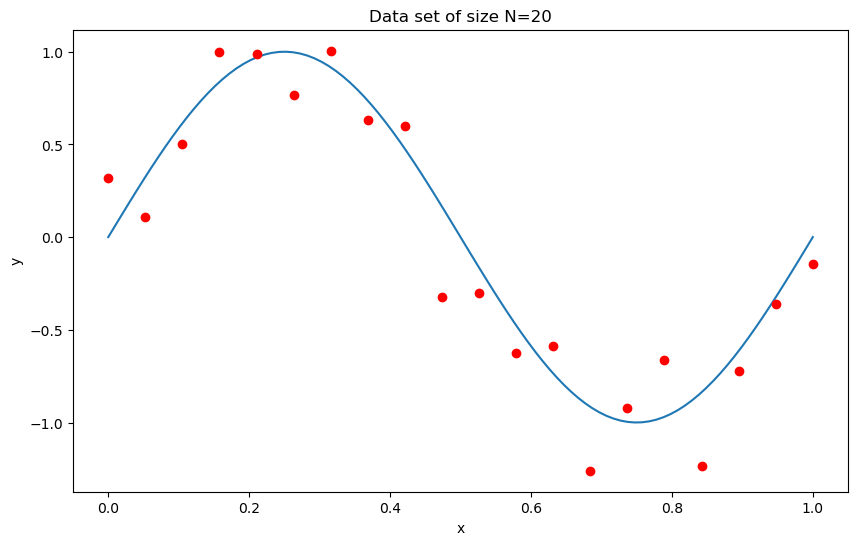

In [2]:
# Plotting the datapoints and the underlying model:
fig1 = plt.figure(1, figsize=(10,6))
x_range = np.linspace(0,1,100)
plt.plot(x_range, f(x_range)) # Plotting the sinusoid
plt.plot(X, y, 'bo', color='red') # Plotting the data points

plt.title('Data set of size N={}'.format(N))

plt.xlabel('x')
plt.ylabel('y');

### Performing $k$-NN regression

C:\Users\diks\AppData\Local\Temp\ipykernel_7268\3455129131.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X, y, 'bo', color='red') # Plotting the data points


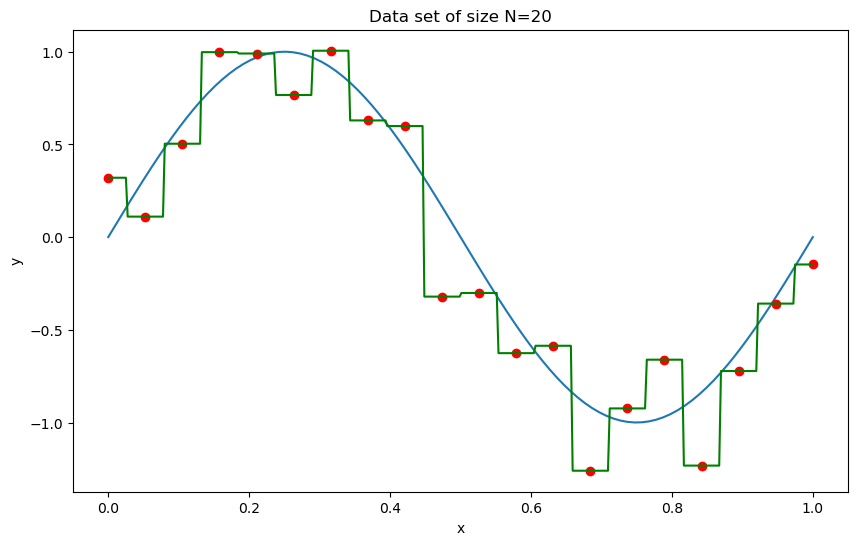

In [3]:
from sklearn.neighbors import KNeighborsRegressor

k = 1

neigh = KNeighborsRegressor(n_neighbors=k, weights='distance') 
neigh.fit(X, y) 

S = 400 # Number of points for the fit plot
Z = np.linspace(0, 1, S).reshape(S,1)

# Plotting the datapoints, the fit and the underlying model:
fig1 = plt.figure(1, figsize=(10,6))

plt.plot(x_range, f(x_range)) # Plotting the sinusoid
plt.plot(X, y, 'bo', color='red') # Plotting the data points
plt.plot(Z, neigh.predict(Z), color='green') # Plotting the fit

plt.title('Data set of size N={}'.format(N))
plt.xlabel('x')
plt.ylabel('y');

## How should we choose $k$?


Recall: **training error** is given by
\begin{equation}
\overline{\text{err}} = \frac{1}{N} \sum_{n=1}^N  L(y_n, \hat{f}(x_n)) \, .
\end{equation}

**In-sample** optimization of the training error w.r.t. $k$ leads to
* $k=1$ being optimal, and 
* an in-sample error equal to zero. 

We already knew that the training error can be a poor predictor of the generalization error for parametric models, 

in this nonparametric setting, optimizing the training error gives a useless estimate of the generalization error (=test error).


<img src="figures_week2/Hastie_fig13.4a.png" alt="Linear model errors" style="display:block; margin-left: auto; margin-right: auto; width: 60%;"/>
<!-- <img src="figures_week6/Hastie_fig13.4b.png" alt="Linear model errors" style="display:block; margin-left: auto; margin-right: auto; width: 20%;"/>
-->



<!-- <table><tr><td><img src='figures_week6/Hastie_fig13.4a.png' style="display:block; margin-left: auto; margin-right: auto; width: 100%;"></td><td><img src='figures_week6/Hastie_fig13.4b.png' style="display:block; margin-left: auto; margin-right: auto; width: 93%;"></td></tr></table>
-->

Fig. 13.4(a) from Hastie et al.


## Leave-one-out ($N$-fold) cross-validation


$k$ is chosen by minimization of

\begin{equation}
CV = \frac{1}{N} \sum_{n=1}^N  L(y_n, \hat{f}^{(n)}(x_n)), 
\end{equation}

where $\hat{f}^{(n)}$ is the estimated regression function based on the entire sample except the $n^{\rm th}$ observed $x$-$y$ pair $(x_n, y_n)$.

Also $K$-fold cross-validation can be used.

But this doesn't save much computational time in the current nonparametric setting.

## Using weighted averages

Responses are weighted according to their distance to $x$ in the calculation of the average, so

$$
  \hat f(x) =  \frac{\sum_{i=1}^k Y_{(i)} w_i}{\sum_{i=1}^k w_i}
$$

where $Y_{(i)}$ is the $i$th-nearest neighbor. 

A popular choice is to use the inverse of the distance as the weight $w_i = 1/d(x, X_{(i)})$.

Aims at keeping both the bias and the variance small

## Curse of dimensionality

The $k$-NN algorithm suffers substantially from the curse of dimensionality. 

For larger dimensions $M$ of the feature space, say $M > 5$.

(Depending on the number of observations in the training set and the irregularity of the regression function.)

Reason: in high-dimensional feature space, there are very few close neighbors to any point typically. 


### Few close neighbors

To see this, consider the case where the $X$-variables are uniformly distributed with uniform density around $x$, then 

$$
  F_R(r) = P(R \leq r) \propto r^M, \qquad \mbox{for $r$ small.}
$$ 

The expected number of neighbours within a given distance $r$ from $x$ is then proportional to $N (r/r_{\rm max})^M$, 

For small $r$ this shrinks to zero fast as $M$ increases. 

Say we consider observations within distance $r = 0.1 r_{\rm max}$ from $x$. 

Then an increase of $M$ by one additional dimension requires $10$ times more observations to retain the same expected number of neighbors within distance $r$ (!)

For large $M$, dimension reduction (e.g. **PCA**) and/or **feature selection** should be used before $k$-NN algorithm 

## $k$-NN is a locally constant model

It is **nonparametric**: the number of parameters is proportional to $N$. 

It uses local averaging of the response across neighbours (either with or without weighting), 

Such models are known as **locally constant models** 

Consider, for example, the equally weighted $k$-NN algorithm. 

* Forecast equals the mean of $Y_n$ across the $k$ nearest neighbors

* Can be thought of as regressing $Y_n$ on a constant  $$\mbox{} \qquad f(X) = c$$ 
locally near $x$, using only the $k$ observations $(X_{n}, Y_{n})$ closest to $x$.


## Kernel regression

Natural extension of KNN. Weights for the estimate of the regression funtction at $X=x$ now determined by a kernel function $K(\cdot)$.



Nadaraya and Watson (NW) have proposed a kernel density estimator for the regression function in this context, given by
$$
 \hat f(x) = \frac{\sum_{i=1}^N K_h(x - X_i) y_i}{\sum_{j=1}^N K_h(x - X_j)} \equiv \sum_{i=1}^N w_i y_i,
$$
where the (local) weights $w_i$ are given by
$$
 w_i = \frac{K_h(x-X_i)}{\sum_{j=1}^N K_h(x-X_j)}.
$$

Here $K_h(x) = \frac{1}{h} K(x/h)$ for a fixed kernel function $K$, so that the so-called bandwidth parameter $h$ acts as a scale parameter of the kernel function $K_h(x)$.

Popular choice for the kernel function $K$: standard normal (gaussian) kernel function 
$K(x) = \frac{1}{\sqrt{2\pi} } \exp(-x^2/2)$. 

For one-dimensional feature vectors $X$, and upon introducing the bandwidth parameter $h$, this gives
$$
  K^1_h(s) =\frac{1}{\sqrt{2 \pi} h} \, {\rm e}^{-s^2/(2 h^2)}.
$$

In multivariate cases (dimension, $M$, say) one typically takes the product kernel, given by
$$
  K^M_h(s) \equiv \prod_{m=1}^M \frac{1}{\sqrt{2 \pi} h}  \, {\rm e}^{-s_m^2/(2 h^2)}
$$
which for the gaussian kernel becomes
$$
  K^M_h(s) \equiv (2 \pi h^2)^{-M/2}  \, {\rm e}^{-\|s\|^2/(2 h^2)},
$$

Other choices for the kernel are possible. Typically, we require the kernel function $K(\cdot)$ to have the following properties:

* Continuity: $K(s)$ is continuous in $s$.
* Positivity: $K(\cdot)$ is a probability kernel, i.e., it is non-negative and integrating to $1$. 
* Symmetry: $K(\cdot)$ is symmetric in its argument, that is, $K(-s) = K(s)$.

Additional properties (such as differentiability) are sometimes added as required, for instance, to perform asymptotics.

## The MSE of the NW estimator

The bias at a given value of $x_0$ is then given by
$$
{\rm bias}(\hat f(x_0)) = \frac{h^2}{2}  \left(f''(x_0) + 2 \frac{f''(x_0)p'(x_0)}{p(x_0)} \right) \int x^2 K(x) {\rm d} x + o(h^2),
$$
where we use the small `oh' notation $o(h^2)$ to indicate that the remainder terms (beyond the leading term(s) given) vanish relative to $h^2$ as $h \rightarrow 0$, or that ${\rm remainder}(h)/h^2 \mathop{\rightarrow}\limits^{P} 0$ as $h \rightarrow 0$.

The variance is
$$
 {\rm Var}(\hat f(x_0)) = \frac{\sigma_{\varepsilon}^2}{N h} \frac{1}{p(x_0)} \left(\int K^2(x) \, {\rm d} x \right)^2 + o\left(\frac{1}{Nh}\right),
$$
where $\sigma_{\varepsilon}^2$ is the variance of the irreducible error term $\varepsilon$.


Squared bias and variance together:
$$
 {\rm MSE}(\hat f(x_0)) = \frac{h^4 \mu_K}{4} \left(f''(x_0) + 2 \frac{f''(x_0)p'(x_0)}{p(x_0)} \right)^2 + \frac{\sigma_{\varepsilon}^2 \sigma^2_K}{N h} \frac{1}{p(x_0)}  + o(h^2) + o\left(\frac{1}{Nh}\right),
$$
where $\mu_K = \int x^2 K(x) \, {\rm d} x$ and $\sigma^2_K = \left(\int K^2(x) \, {\rm d} x \right)^2$.

A global measure of the expected MSE is the so-called mean integrated squared error is
$$
 {\rm MISE}(\hat f) = \frac{h^4 \mu_K}{4} \int \left(f''(x) + 2 \frac{f''(x)p'(x)}{p(x)} \right)^2 \, {\rm d} x + \frac{\sigma^2_{\varepsilon} \sigma^2_K}{N h} \int \frac{1}{p(x)} \, {\rm d} x  + o(h^2) + o\left(\frac{1}{Nh}\right).
$$

MISE-optimal bandwidth value for a given sample size $N$ can be found by minimizing the leading MISE terms, the so-called AMISE, with respect to $h$. 

Leads to
$$
  h^* = C^* \times N^{-\frac{1}{3}},
$$
where $C^*$ depends on the underlying density $p(x)$ and on the kernel function $K$ used.  


## Local linear models: $k$-NN

obtained by performing a **local linear regression** of $Y$ on $X$, locally near $x$, 

using the $k$ closest neighbours of $x$ in feature space. 

This may improve the performance in particular if the regression function has smooth derivatives. 

Note: although a parametric estimation step is involved (a different one for each possible $x$) this is still a **nonparametric** method; the number of parameters is still proportional to $N$. 

However, we now estimate a local model with $M+1$ regressors (including a constant for the intercept), instead of one

$\Rightarrow$ the local linear approach suffers even more from the **curse of dimensionality** than the locally constant $k$-NN method.



## Local linear models: kernel regression


The NW estimator is the result of a locally constant kernel regression near $x=X$. 

This setup can be generalized to the local linear (and higher-order) regression, by estimating a linear model locally. 

That is by performing a weighted linear regression for the model
$$ 
  y = \beta' X + \varepsilon.
$$
with weights $w_i$ determined by the kernel function, locally near $X=x$.





## Test for linearity

 Local linear models can also be used to test for linearity. 
 
The idea is that by choosing $k$ = $N$ for $k$-NN (or $h \to \infty$ in kernel regression) you end up with a global linear model. 
 
 Testing the performance of this global linear model against that obtained with smaller number of neighbors $k$ or smaller kernel bandwidth $h$ provides a test for linearity versus nonlinearity. 
 
Suppose that at a given level of confidence, the flexible model with smaller $k$ or $h$ performs significantly better than the global linear model obtained, 

then the null hypothesis of a global linear model can be rejected, in favor of the nonlinear model with higher complexity.